# Gradient descent algorithm

In [2]:
# Import libraries
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

### Prepare some demonstrating data

[(1.0, 38.352984374250575),
 (2.0, 41.45202893731496),
 (3.0, 49.9041313324819),
 (4.0, 49.16598065698017),
 (5.0, 58.43148833802561),
 (6.0, 58.43070845703831),
 (7.0, 60.83707812977083),
 (8.0, 62.24378813242513),
 (9.0, 71.40376015691912),
 (10.0, 81.50859943441492)]

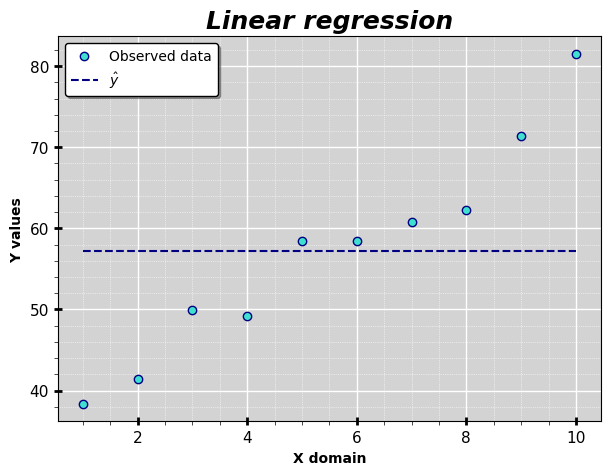

In [10]:
np.random.seed(93)

def f(a, x, b):
    return a * x + b

# Data preparation
x_observed = np.arange(1, 11, 1) # array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
y_observed = f(a=5, b=0, x=x_observed)
noise = np.random.normal(y_observed.mean(), y_observed.std()/4, len(y_observed))
y_observed = y_observed + noise

# Plotting
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.scatter(x_observed, y_observed, edgecolors="navy", color="turquoise", label="Observed data")
ax.plot(x_observed, [y_observed.mean() for _ in x_observed], label=r"$\hat{y}$", linestyle="--", color="navy")
ax.minorticks_on()
ax.tick_params(axis="y", which='minor', width=0.5, length=3)
ax.tick_params(axis="y", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.tick_params(axis="x", which='minor', width=0.5, length=3)
ax.tick_params(axis="x", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.set_xlabel("X domain", fontdict={"fontweight":"bold"})
ax.set_ylabel("Y values", fontdict={"fontweight":"bold"})
ax.set_title("Linear regression", fontsize=18, fontweight="bold", fontstyle="italic")
ax.set_facecolor("lightgrey")
ax.grid(axis="both", which='major', linewidth=1, linestyle='-', color="white")
ax.grid(axis="both", which='minor', linewidth=0.5, linestyle=':', color="white")
ax.set_axisbelow(True)
ax.legend(fancybox=True, shadow=True, facecolor="white", edgecolor="black", loc='upper left')

points = [(float(x), float(y)) for x, y in zip(x_observed,y_observed)]
[i for i in points]

### ***The cost function***

Cost function $J(\theta)$ can be defined as:

$J(\theta) = \sum_{i=1}^{n}[f_\theta(x_i) - y_i]^2$

where:

- $\theta$ represents the vector of parameters 

$\theta = \left[\begin{matrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{matrix}\right]$

- $f_\theta(x_i)$ - value returned by the regression model for $x_i$ argument with $\theta$ parameters
- $y_i$ - observed value for $x_i$
- $n$ - number of data points

In case of linear regression model we are going to train using gradient descent:

$\theta = \left[\begin{matrix} a \\ b \end{matrix}\right]$

$f_\theta(x) = f_{a,b}(x) = ax+b$

In [167]:
a, b, i, n = smp.symbols("a, b, i, n")
x, y_obs = smp.symbols("x, y_obs", cls=smp.Function)

y_obs(i) # observed value for ith point
predicted_value = a * x(i) + b # predicted value for ith point
residual = y_obs(i) - predicted_value # residual for ith point

# Sums of squared residuals
ss = smp.Sum(residual ** 2, (i, 1, n))
ss

Sum((-a*x(i) - b + y_obs(i))**2, (i, 1, n))

### ***Gradient descent algorithm***

Gradient descent is an algorithm that enables finding $\theta$ values that minimize the cost function $J(\theta)$:

$\theta_{min} = \underset{\theta}{\operatorname{argmin}} \, J(\theta)$

In our case:

$(a_{min}, b_{min}) = \underset{a, b}{\operatorname{argmin}} \, J(a,b)$

The general formula for gradient descent algorithm used for minimization of parameters is following:

$\theta := \theta - \eta \nabla J(\theta)$

where $\theta$ represents the vector of parameters that the gradient descent algorithm seeks to optimize. The learning rate $η$ controls the size of the steps taken in the direction of the negative gradient $\nabla J(\theta)$, which is the vector of partial derivatives of the cost function $J(\theta)$ with respect to the parameters $\theta$.

In our case:

$
\left[\begin{matrix} a \\ b \end{matrix}\right]
:= \left[\begin{matrix} a \\ b \end{matrix}\right] - \eta \nabla J(a,b)
$

$
\left[\begin{matrix} a \\ b \end{matrix}\right]
:= \left[\begin{matrix} a \\ b \end{matrix}\right] - \eta \left[\begin{matrix} \frac{\partial J(a,b)}{\partial a} \\ \frac{\partial J(a,b)}{\partial b} \end{matrix} \right]
$

### Calculating the cost function

In [168]:
ss = ss.subs(n, len(points) - 1).doit() \
.replace(x, lambda i: points[i][0]) \
.replace(y_obs, lambda i: points[i][1])
ss = ss.simplify()
ss

384.0*a**2 + 108.0*a*b - 6907.10350931314*a + 9.0*b**2 - 1066.75512715074*b + 32771.9611839692

In [169]:
ss_f = smp.lambdify((a, b), ss)

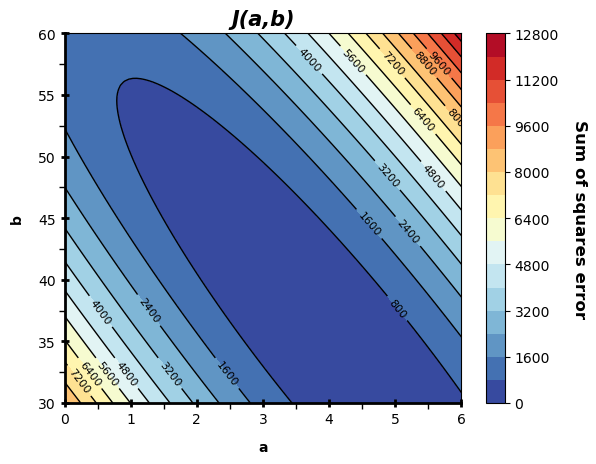

In [191]:
a_domain = np.linspace(0, 6, 100)
b_domain = np.linspace(30, 60, 100)

a_domain_mesh, b_domain_mesh = np.meshgrid(a_domain, b_domain) # Meshgrid of pH and Cond domains
ss_mesh = ss_f(a_domain_mesh, b_domain_mesh) # Meshgrid of response variable

fig, ax = plt.subplots(dpi=100)

cf = ax.contourf(a_domain_mesh, b_domain_mesh, ss_mesh, cmap="RdYlBu_r", levels=16)
cp = ax.contour(a_domain_mesh, b_domain_mesh, ss_mesh, colors="black", levels=16, linewidths=1)
cbar = plt.colorbar(cf) # Add colorbar
plt.clabel(cp, fontsize=8) # Add labels of contours

# Spines
ax = plt.gca()
for i in ["left", "bottom"]:
    ax.spines[i].set_linewidth(2)

# Ticks
ax.minorticks_on()
ax.tick_params(which='minor', width=1, length=4, direction="out")
ax.tick_params(which='major', width=2, length=6, direction="inout", labelsize=10)
ax.set_xticks(np.arange(0, 6.5, 1))
ax.set_xticks(np.arange(0, 6, 1/2), minor=True)
ax.set_yticks(np.arange(30, 65, 5))
ax.set_yticks(np.arange(30, 60, 5/2), minor=True)

# Labels
ax.set_title("J(a,b)", fontsize=15, fontweight="bold", fontstyle="italic", ha="center")
ax.set_xlabel("a", fontsize=10, fontweight="bold", labelpad=10)
ax.set_ylabel("b", fontsize=10, fontweight="bold", labelpad=10)
cbar.set_label('Sum of squares error', rotation=-90, labelpad=20, fontsize=12, fontweight='bold')

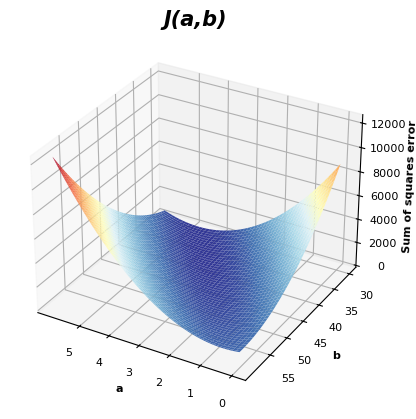

In [214]:
ax = plt.axes(projection="3d")
ax.plot_surface(a_domain_mesh, b_domain_mesh, ss_mesh, cmap="RdYlBu_r")

# Ticks
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(30, 60, 5))

# Labels
ax.set_title("J(a,b)", fontsize=15, fontweight="bold", fontstyle="italic", ha="center")
ax.set_xlabel("a", fontsize=8, fontweight="bold", labelpad=1)
ax.set_ylabel("b", fontsize=8, fontweight="bold", labelpad=1)
ax.set_zlabel("Sum of squares error", fontsize=8, fontweight="bold", labelpad=1.5)

ax.grid(True)

ax.view_init(elev=30, azim=120)

plt.show()

### Partial derivative of the cost function in respect to $a$

In [171]:
ss_da = smp.diff(ss, a)
ss_da

768.0*a + 108.0*b - 6907.10350931314

### Partial derivative of the cost function in respect to $b$

In [172]:
ss_db = smp.diff(ss, b).simplify()
ss_db

108.0*a + 18.0*b - 1066.75512715074

---

Since both derivatives are linear we can compute parameters using linear algebra. But in most scenerios it is not a case hence gradient descent is the rescue.

In [173]:
A, B = smp.linear_eq_to_matrix([ss_da, ss_db], (a,b))

In [174]:
A # Hessian matrix

Matrix([
[768.0, 108.0],
[108.0,  18.0]])

In [175]:
B

Matrix([
[6907.10350931314],
[1066.75512715074]])

In [176]:
X = smp.Matrix([a,b])
X # Variables matrix

Matrix([
[a],
[b]])

$AX=B$

$A^{-1}AX=A^{-1}B$

$IX=A^{-1}B$

$X=A^{-1}B$

In [177]:
algebra = smp.Eq(X, A.inv() @ B)
algebra

Eq(Matrix([
[a],
[b]]), Matrix([
[4.22143955340578],
[33.9355364101621]]))

In [178]:
A.eigenvals()

{783.242232465939: 1, 2.75776753406097: 1}

**Both eigenvalues calculated for the Hessian matrix are positive, hence calculated point is a local minimum.**

--- 
##### *But coming back to the algorithm..*

Note: When we introduced the $x$ values into the loss function, we observed that it took the form of a second-order polynomial. By taking partial derivatives and applying linear algebra, we were able to calculate the local minimum point. However, compiling these functions with lamdify with the $x$ values already introduced would limit us to the gradient specific to this particular dataset. Therefore, to maintain generality, we will compile the functions before introducing the $x$ values.

**Partial derivative in respect to $a$**

$
\frac{\partial}{\partial a} \sum_{i=1}^{n} ((ax_i+b) - y_i)^2
$

Using Chain Rule:

$\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) \frac{\partial}{\partial a} (ax_i+b - y_i)$

$=\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) \frac{\partial}{\partial a} ax_i + \frac{\partial}{\partial a} b - \frac{\partial}{\partial a} y_i$

$=\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) x_i \frac{\partial}{\partial a}a + 0 - 0$

$=\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) x_i$

$=\sum_{i=1}^{n} 2 x_i ((ax_i+b) - y_i)$

$=2 \sum_{i=1}^{n} x_i ((ax_i+b) - y_i)$

**Partial derivative in respect to $b$**

$
\frac{\partial}{\partial b} \sum_{i=1}^{n} ((ax_i+b) - y_i)^2
$

Using Chain Rule:

$\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) \frac{\partial}{\partial b} (ax_i+b - y_i)$

$=\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) \frac{\partial}{\partial b} ax_i + \frac{\partial}{\partial b} b - \frac{\partial}{\partial b} y_i$

$=\sum_{i=1}^{n} 2 ((ax_i+b) - y_i) 0 + 1 - 0$

$=\sum_{i=1}^{n} 2 ((ax_i+b) - y_i)$

$=2 \sum_{i=1}^{n} ((ax_i+b) - y_i)$

### We train the model

In [179]:
def sse(a, b, x_values, y_observed):
    residuals = (a * x_values + b) - y_observed
    return np.sum(residuals ** 2)

def ss_da(a, b, x_values, y_obs_values):
    residuals = (a * x_values + b) - y_obs_values
    return 2 * np.sum(x_values * residuals)

def ss_db(a, b, x_values, y_obs_values):
    residuals = (a * x_values + b) - y_obs_values
    return 2 * np.sum(residuals)

# Collecting data
gradient_descent = []

# Initialize parameters
a = 1
b = y_observed.mean()
eta = 0.001 # learning rate
step_threshold = 1 / 10_000_000

# Init
current_iteration = 0
current_step_a = eta * ss_da(a, b, x_observed, y_observed)
current_step_b = eta * ss_db(a, b, x_observed, y_observed)
current_sse = sse(a, b, x_observed, y_observed)
SST = np.sum((y_observed.mean() - y_observed)**2)
current_r_squared = (SST - current_sse) / SST

print(f"Iteration 0: a = {a}, b = {b}, SSE = {current_sse}")

# Gradient Descent Algorithm
while np.absolute(current_step_a) > step_threshold and np.absolute(current_step_b) > step_threshold:
    # Update parameters
    current_step_a = eta * ss_da(a, b, x_observed, y_observed)
    current_step_b = eta * ss_db(a, b, x_observed, y_observed)
    a -= current_step_a
    b -= current_step_b
    current_sse = sse(a, b, x_observed, y_observed)
    current_r_squared = (SST - current_sse) / SST
    
    # Increment iteration counter
    current_iteration += 1
    
    # Evaluate 
    if current_iteration % 100 == 0:
        print(f"Iteration {current_iteration}: a = {a}, b = {b}, SSE = {current_sse}")
    
    gradient_descent.append((current_iteration, a, b, current_sse, current_step_a, current_step_b, current_r_squared))

print(f"Gradient Descent completed after {current_iteration} iterations reaching for all paremeters step size lower than {step_threshold}. R-squared: {current_r_squared:.3f}")

Iteration 0: a = 1, b = 57.17305479496215, SSE = 1245.5571978874316
Iteration 100: a = 2.0283928100350193, b = 49.20711024487237, SSE = 587.2680867062692
Iteration 200: a = 2.7780399599779244, b = 43.9881999475197, SSE = 305.7801308497739
Iteration 300: a = 3.2701805389368, b = 40.56200465621606, SSE = 184.46237153319822
Iteration 400: a = 3.5932690072600972, b = 38.312720130267046, SSE = 132.1759471254057
Iteration 500: a = 3.8053753907335386, b = 36.83607316518743, SSE = 109.6411575550032
Iteration 600: a = 3.9446224463268793, b = 35.86665989873604, SSE = 99.92894742141803
Iteration 700: a = 4.036037622871266, b = 35.23024367780044, SSE = 95.74310732807135
Iteration 800: a = 4.096051347879904, b = 34.81243878458644, SSE = 93.93906303268693
Iteration 900: a = 4.135450136194487, b = 34.53815141878526, SSE = 93.16154269098007
Iteration 1000: a = 4.161315294880006, b = 34.35808277846989, SSE = 92.82644122849686
Iteration 1100: a = 4.178295675811648, b = 34.23986838266533, SSE = 92.682016

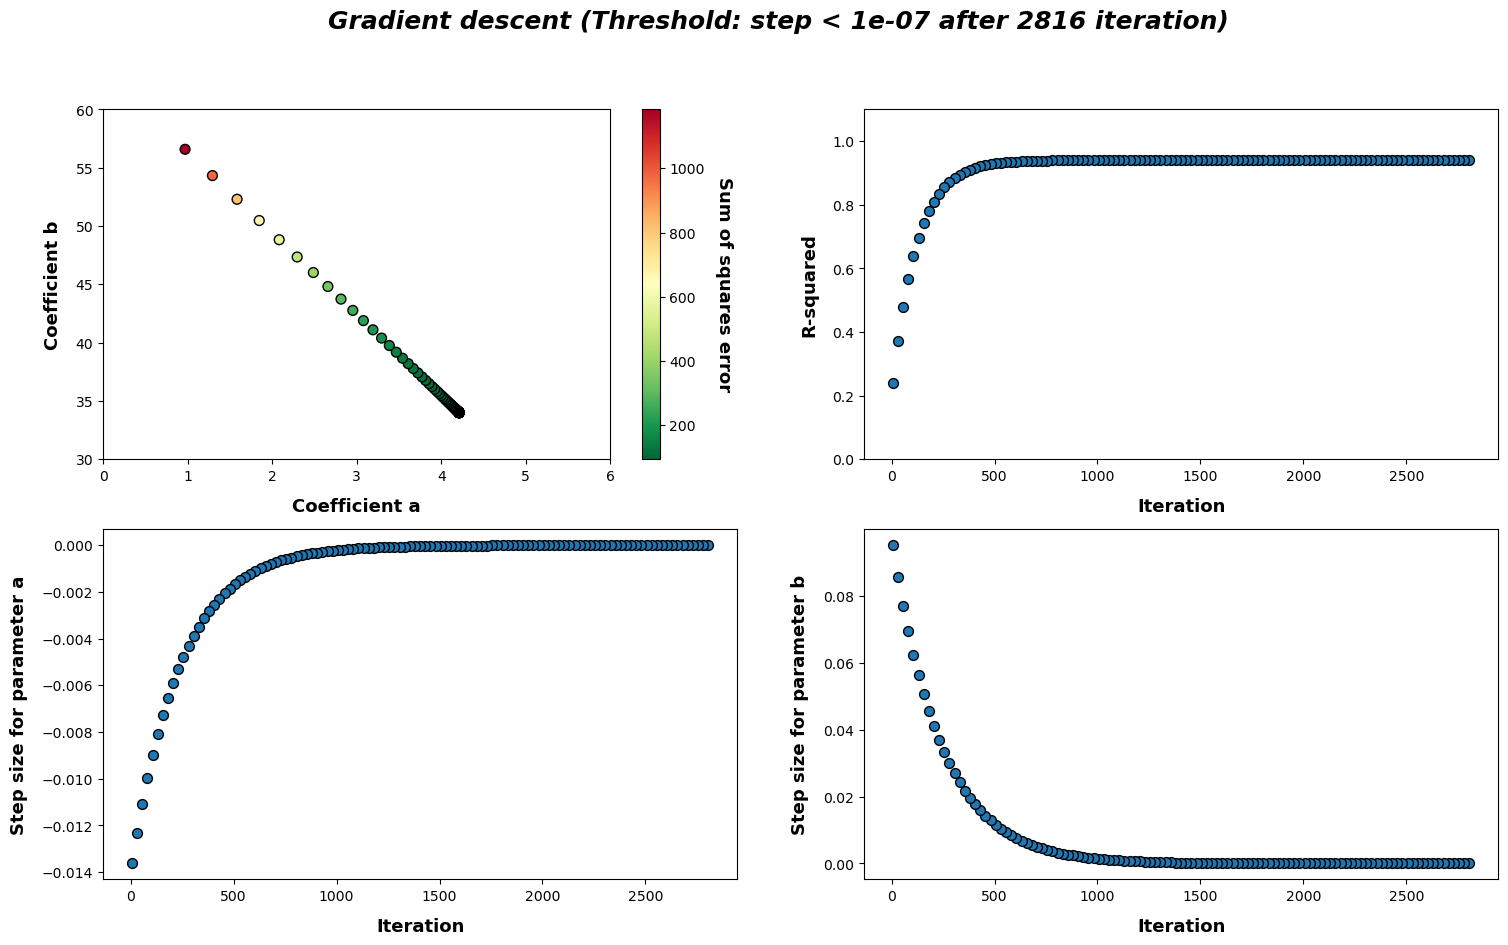

In [180]:
fig, axes = plt.subplots(figsize=(18, 10), ncols=2, nrows=2)

# Starting from 5 every 25 element from the list
points = gradient_descent[5::25]
points.reverse()

iterations_values = [point[0] for point in points]
a_values = [point[1] for point in points]
b_values = [point[2] for point in points]
ss_values = [point[3] for point in points]
step_a_values = [point[4] for point in points]
step_b_values = [point[5] for point in points]
r_squared_values = [point[6] for point in points]


ax = axes[0, 0]
scatter = ax.scatter(a_values, b_values, c=ss_values, cmap='RdYlGn_r', marker='o', edgecolors="black", s=50)
cbar = plt.colorbar(scatter, label="Cost function", ax=ax)
ax.set_ylim(30, 60)
ax.set_xlim(0, 6)
ax.set_xlabel("Coefficient a", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("Coefficient b", fontsize=13, fontweight="bold", labelpad=10)
cbar.set_label('Sum of squares error', rotation=-90, labelpad=20, fontsize=13, fontweight='bold')

ax = axes[0, 1]
scatter = ax.scatter(iterations_values, r_squared_values, edgecolors="black", s=50)
ax.set_ylim(0, 1.1)
ax.set_xlabel("Iteration", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("R-squared", fontsize=13, fontweight="bold", labelpad=10)

ax = axes[1, 0]
scatter = ax.scatter(iterations_values, step_a_values, edgecolors="black", s=50)
ax.set_xlabel("Iteration", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("Step size for parameter a", fontsize=13, fontweight="bold", labelpad=10)

ax = axes[1, 1]
scatter = ax.scatter(iterations_values, step_b_values, edgecolors="black", s=50)
ax.set_xlabel("Iteration", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("Step size for parameter b", fontsize=13, fontweight="bold", labelpad=10)

fig.suptitle(f"Gradient descent (Threshold: step < {step_threshold} after {current_iteration} iteration)", fontsize=18, fontweight="bold", fontstyle="italic", ha="center")

plt.show()

### Optimized model representation

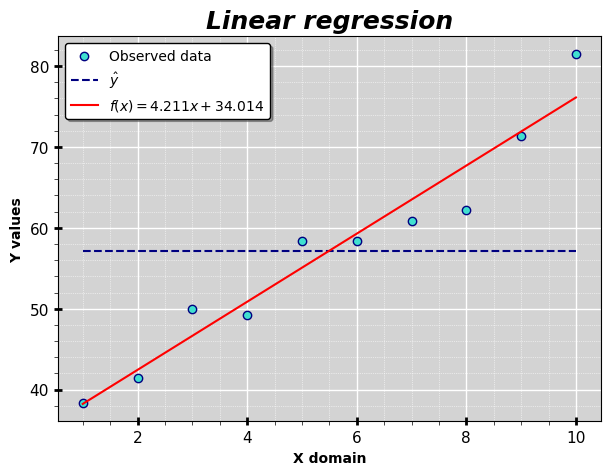

In [181]:
xdomain = np.linspace(x_observed.min(), x_observed.max(), 100)
y_predicted = f(a=a, b=b, x=xdomain)

# Plotting
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.scatter(x_observed, y_observed, edgecolors="navy", color="turquoise", label="Observed data")
ax.plot(x_observed, [y_observed.mean() for _ in x_observed], label=r"$\hat{y}$", linestyle="--", color="navy")
ax.plot(xdomain, y_predicted, color="red", label=f"$f(x) = {a:.3f}x+{b:.3f}$")
ax.minorticks_on()
ax.tick_params(axis="y", which='minor', width=0.5, length=3)
ax.tick_params(axis="y", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.tick_params(axis="x", which='minor', width=0.5, length=3)
ax.tick_params(axis="x", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.set_xlabel("X domain", fontdict={"fontweight":"bold"})
ax.set_ylabel("Y values", fontdict={"fontweight":"bold"})
ax.set_title("Linear regression", fontsize=18, fontweight="bold", fontstyle="italic")
ax.set_facecolor("lightgrey")
ax.grid(axis="both", which='major', linewidth=1, linestyle='-', color="white")
ax.grid(axis="both", which='minor', linewidth=0.5, linestyle=':', color="white")
ax.set_axisbelow(True)
ax.legend(fancybox=True, shadow=True, facecolor="white", edgecolor="black", loc='upper left')
plt.show()

In [182]:
df = DataFrame({"x": x_observed,
                "y": y_observed})

model = LinearRegression()
model.fit(X=df[["x"]], y=df["y"])

DataFrame({
    "Sklearn Linear Regression": [model.coef_[0], model.intercept_, sse(model.coef_[0], model.intercept_, x_observed, y_observed)],
    "Custom Gradient Descent": [a, b, sse(a, b, x_observed, y_observed)],
    "Algebra": [algebra.rhs[0], algebra.rhs[1], sse(algebra.rhs[0], algebra.rhs[1], x_observed, y_observed)]
}, index=["a", "b", "SSE"], dtype=float)

,Sklearn Linear Regression,Custom Gradient Descent,Algebra
a,4.210748,4.210724,4.221440
b,34.013940,34.014105,33.935536
SSE,92.572625,92.572625,92.585897
